# Iris Dataset Classification using K nearest neighbors and Logistic Regression

In [132]:
import sklearn

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
from sklearn import datasets

In [146]:
df = datasets.load_iris()
print(type(df))
X = df.data
y = df.target
print(X.shape)
print(y.shape)
data1 = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])
print(data1.head())

<class 'sklearn.utils.Bunch'>
(150, 4)
(150,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [137]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=3)
lgr = LogisticRegression(random_state=0).fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [139]:
y_predictionsKNN = knn.predict(x_test)
y_predictionsLGR = lgr.predict(x_test)

In [140]:
print("Accuracy in KNN algo : ",metrics.accuracy_score(y_test,y_predictionsKNN))
print("Accuracy in LGR algo : ",metrics.accuracy_score(y_test,y_predictionsLGR))

Accuracy in KNN algo :  0.9666666666666667
Accuracy in LGR algo :  0.9666666666666667


In [141]:
print(df.target_names)

['setosa' 'versicolor' 'virginica']


In [149]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [150]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


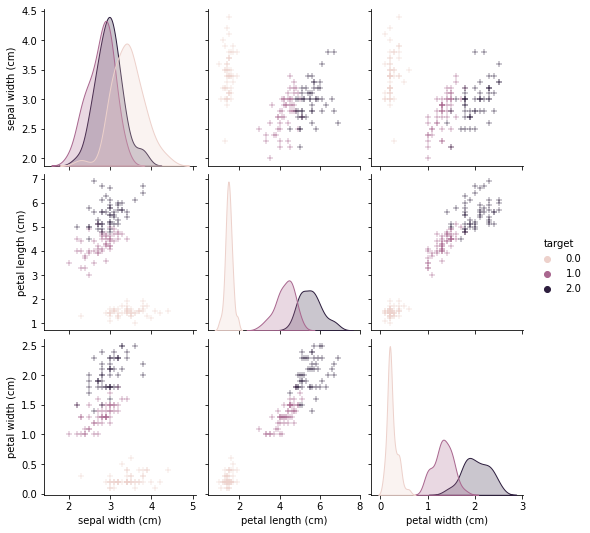

In [153]:
import seaborn as sns
tmp = data1.drop('sepal length (cm)', axis=1)
g = sns.pairplot(tmp, hue='target', markers='+')
plt.show()